In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# Load the dataset
data = pd.read_csv('/content/Dataset .csv')

In [4]:
# Display the first few rows
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
# Display summary statistics
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
#Checking missing values
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
# drop all missing values
data.dropna(subset=['Cuisines'], inplace=True)

In [9]:
# Encode categorical variables
data['Has Table booking'] = data['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Has Online delivery'] = data['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Is delivering now'] = data['Is delivering now'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Switch to order menu'] = data['Switch to order menu'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert cuisine to a list of cuisines
data['Cuisines'] = data['Cuisines'].apply(lambda x: x.split(', '))

# Display the first few rows after preprocessing
data.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"[French, Japanese, Desserts]",...,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,[Japanese],...,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",...,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"[Japanese, Sushi]",...,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"[Japanese, Korean]",...,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229


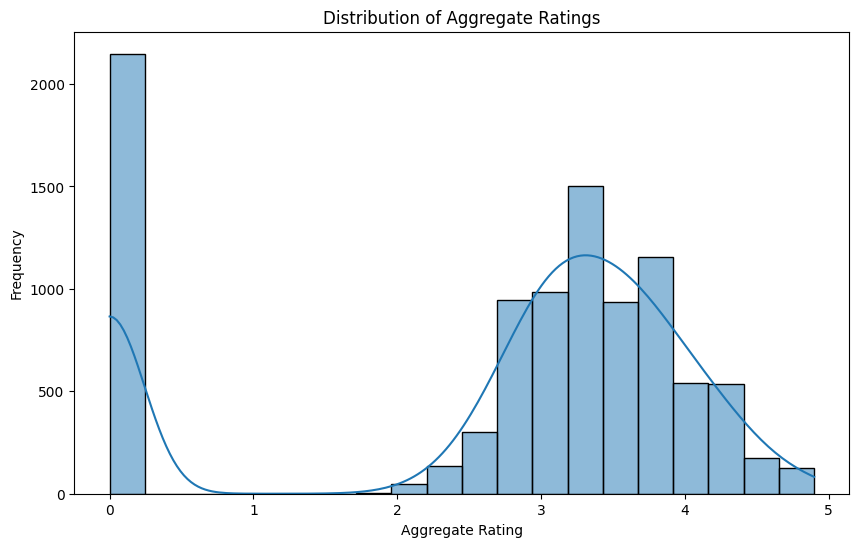

In [10]:
# Plot the distribution of aggregate ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

The above chart shows that restaurant ratings are predominantly either 0 or clustered between 2.5 and 4, indicating many non-rated restaurants and a concentration of average to good ratings.

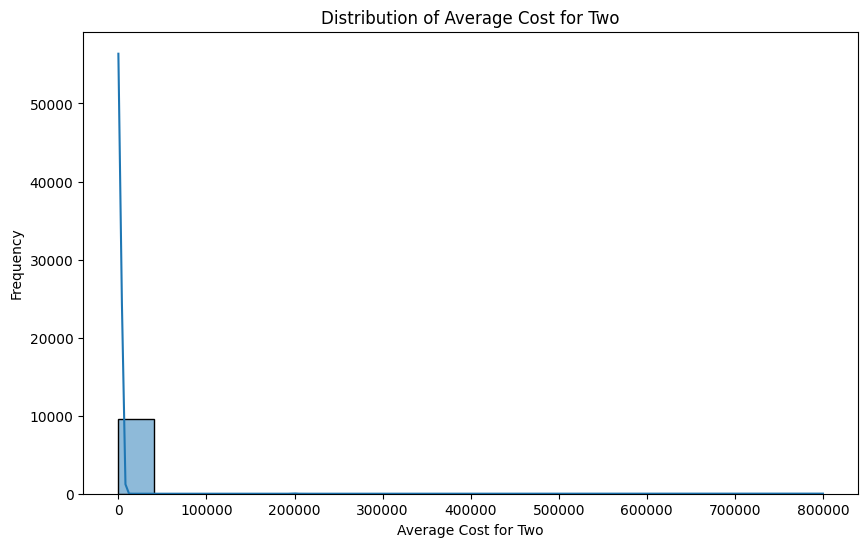

In [11]:
# Plot the distribution of average cost for two
plt.figure(figsize=(10, 6))
sns.histplot(data['Average Cost for two'], bins=20, kde=True)
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()

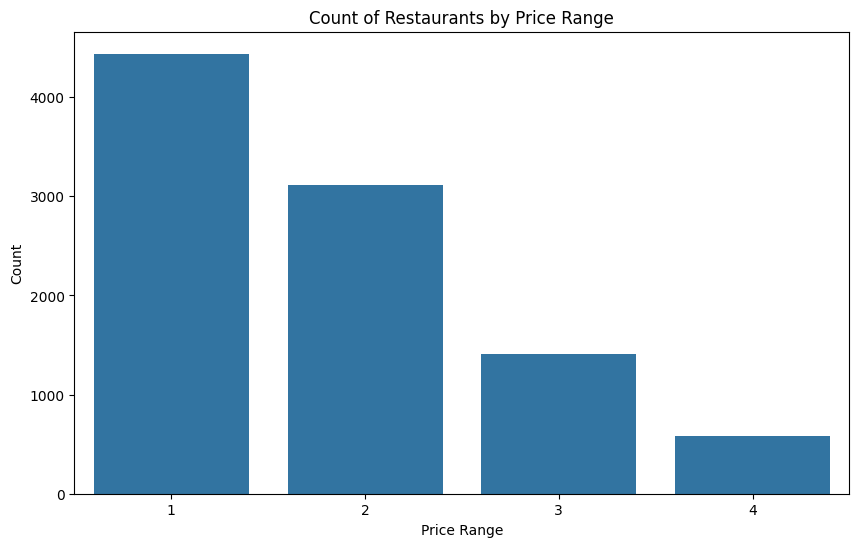

In [12]:
# Plot the count of restaurants by price range
plt.figure(figsize=(10, 6))
sns.countplot(x='Price range', data=data)
plt.title('Count of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

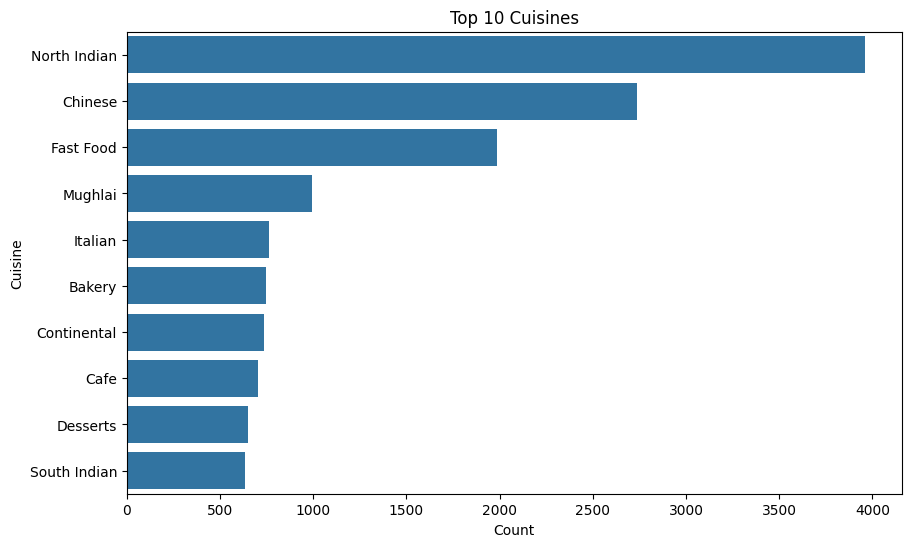

In [13]:
# Plot the top 10 cuisines
top_cuisines = data['Cuisines'].explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 10 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

In [14]:
# Convert the list of cuisines to a string
data['Cuisines'] = data['Cuisines'].apply(lambda x: ' '.join(x))

In [15]:
# Combine relevant features into a single string
data['combined_features'] = data['Cuisines'] + ' ' + data['Price range'].astype(str) + ' ' + data['Average Cost for two'].astype(str)

In [16]:
# Compute TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

In [30]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get restaurant recommendations based on user preferences
def get_recommendations(user_preferences, df=data, cosine_sim=cosine_sim):
    user_preference_string = ' '.join(user_preferences['Cuisines']) + ' ' + str(user_preferences['Price range']) + ' ' + str(user_preferences['Average Cost for two'])

    user_tfidf = tfidf.transform([user_preference_string])
    user_cosine_sim = cosine_similarity(user_tfidf, tfidf_matrix).flatten()

    # Get the indices of the top 10 most similar restaurants
    top_indices = user_cosine_sim.argsort()[-10:][::-1]

    # Return the top 10 recommendations
    recom = df.iloc[top_indices][['Restaurant Name', 'Cuisines', 'Average Cost for two', 'Aggregate rating']]
    return recom

# Sample user preferences
user_preferences = {
    'Cuisines': ['Italian', 'Chinese'],
    'Price range': 3,
    'Average Cost for two': 1500
}

# Get recommendations
recommendations = pd.DataFrame(get_recommendations(user_preferences))
recommendations



,Restaurant Name,Cuisines,Average Cost for two,Aggregate rating
3219,28 Capri Italy,Italian,1500,3.9
1231,Italiano,Italian,1500,3.6
1285,Italiano,Italian,1500,3.0
926,Oxy Lounge,North Indian Chinese Italian,1500,3.1
2328,Square - Sayaji Hotel,North Indian Chinese Italian,1500,4.3
2376,Verandah,Chinese Italian Fast Food,1500,3.7
8460,The Tandoori Village,North Indian Mughlai Italian Chinese,1500,3.5
1262,Nooba,Chinese,1500,3.8
1487,Nooba,Chinese,1500,3.6
2369,Chin Mi,Chinese,1500,3.9


In [29]:
def input_user_preferences():
    print("Enter your preferences for restaurant recommendations:")
    cuisines = input("Enter preferred cuisines (comma separated): ").split(',')
    cuisines = [cuisine.strip() for cuisine in cuisines]
    price_range = int(input("Enter preferred price range (1 to 4): "))
    avg_cost = int(input("Enter preferred average cost for two: "))

    user_preferences = {
        'Cuisines': cuisines,
        'Price range': price_range,
        'Average Cost for two': avg_cost
    }

    return user_preferences

# Function to recommend restaurants based on user input
def recommend_restaurants():
    user_preferences = input_user_preferences()
    recommendations = get_recommendations(user_preferences, data, cosine_sim)
    return recommendations

# Call the recommend_restaurants function to get user input and show recommendations
recommendations_df = pd.DataFrame(recommend_restaurants())
print("\nRecommended Restaurants:")
recommendations_df


Enter your preferences for restaurant recommendations:
Enter preferred cuisines (comma separated): Italian
Enter preferred price range (1 to 4): 3
Enter preferred average cost for two: 1000

Recommended Restaurants:


,Restaurant Name,Cuisines,Average Cost for two,Aggregate rating
943,Cafe Parmesan,Italian,1000,4.5
9221,Little Italy,Italian,1000,4.1
9209,Black Pepper,North Indian Italian,1000,4.1
5499,Basil Tree,North Indian Italian Chinese,1000,2.4
4539,Rumours,North Indian Chinese Italian,1000,3.4
679,Cafe El Chico,Continental Italian,1000,3.6
2783,By The Way - Bellagio,Italian Continental,1000,2.9
3123,Gyms Kook,Continental Italian,1000,3.3
9135,Tanto Pizzeria,Pizza Italian,1000,3.8
1406,Baking Bad,Italian Pizza,1000,3.7


Recommendation Function: The get_recommendations function takes user preferences and computes the cosine similarity with the training data. It then returns the top-N most similar restaurants.

User Input: The input_user_preferences function prompts the user to enter their preferences for cuisines, price range, and average cost for two.

Integration: The recommend_restaurants function integrates user input and the recommendation function to display the recommended restaurants.